In [3]:
import shutil
from pathlib import Path
from sklearn.model_selection import train_test_split

# --- CONFIG ---
DATASET_DIR = Path("dataset")
IMAGES_DIR = DATASET_DIR / "images"
LABELS_DIR = DATASET_DIR / "labels"
SPLITS = {"train": 0.8, "val": 0.1, "test": 0.1} 

# --- Create output folders ---
for split in SPLITS.keys():
    (DATASET_DIR / f"images/{split}").mkdir(parents=True, exist_ok=True)
    (DATASET_DIR / f"labels/{split}").mkdir(parents=True, exist_ok=True)

# --- Collect image files ---
image_files = IMAGES_DIR.glob("*.jpg")
image_files = list(image_files)

# --- Split by sampling images: random with stratified option (SEEDED)---
train_imgs, test_imgs = train_test_split(image_files, test_size=SPLITS["test"], random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)  # 50% of test set for validation

# --- Function to copy images and labels ---
def copy_files(img_list, split_name):
    for img_path in img_list:
        label_path = LABELS_DIR / (img_path.stem + ".txt")
        shutil.copy(img_path, DATASET_DIR / f"images/{split_name}/{img_path.name}")
        shutil.copy(label_path, DATASET_DIR / f"labels/{split_name}/{label_path.name}")

# --- Perform the actual file copying ---
copy_files(train_imgs, "train")
copy_files(val_imgs, "val")
copy_files(test_imgs, "test")


In [4]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available
print(torch.cuda.device_count()) 

True
1


In [10]:
# This will empty the GPU cache

import torch
import gc

gc.collect()  # garbage collection for CPU
torch.cuda.empty_cache()  # release unreferenced GPU memory
torch.cuda.ipc_collect()  # collect inter-process memory if needed


In [ ]:
from ultralytics import YOLO

# Load the model architecture
model = YOLO("yolov8n.yaml")  # 'n' is the nano model — faster, smaller

# Train the model
model.train(
    data="data.yaml",      # path to a config file
    epochs=20,
    imgsz=640,             # YOLO will resize input images to this size automatically
    batch=16,
    iou = 0.5,
    cfg="no_aug.yaml",
    name="no_aug_training",
    project="runs/train",
    verbose=False,
    device=0                 # 0 = GPU, 'cpu' = cpu
)


Ultralytics 8.3.105  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=runs/train, name=poker_cards8, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning D:\datasets\dataset_no_augment\labels\train... 1905 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1905/1905 [00:03<00:00, 554.93it/s]


train: New cache created: D:\datasets\dataset_no_augment\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\datasets\dataset_no_augment\labels\val... 106 images, 0 backgrounds, 0 corrupt: 100%|██████████| 106/106 [00:00<00:00, 402.31it/s]


val: New cache created: D:\datasets\dataset_no_augment\labels\val.cache
Plotting labels to runs\train\poker_cards8\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000179, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to runs\train\poker_cards8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.77G      3.353      5.687      4.304          8        640: 100%|██████████| 120/120 [00:43<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        106        532          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.47G       2.68       5.17      3.674          7        640: 100%|██████████| 120/120 [00:33<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


                   all        106        532      0.014      0.404     0.0226    0.00724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.48G      1.876      4.055      2.824          8        640: 100%|██████████| 120/120 [00:32<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.07it/s]

                   all        106        532      0.132      0.269       0.11     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.5G      1.385       3.06      2.138          9        640: 100%|██████████| 120/120 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.96it/s]

                   all        106        532      0.077      0.652      0.127      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.52G      1.092      2.726       1.77          5        640: 100%|██████████| 120/120 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.95it/s]

                   all        106        532     0.0802       0.64      0.131      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.54G     0.9005      2.604      1.569          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        106        532     0.0969      0.847      0.126      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.55G     0.7867      2.581      1.432          0        640: 100%|██████████| 120/120 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.94it/s]

                   all        106        532     0.0793      0.925      0.126      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.57G     0.7046      2.465      1.369          5        640: 100%|██████████| 120/120 [00:32<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        106        532     0.0781      0.879      0.132      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.59G     0.6533      2.433      1.313          5        640: 100%|██████████| 120/120 [00:32<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]

                   all        106        532     0.0757      0.949      0.133      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       4.6G     0.6157      2.388      1.264         10        640: 100%|██████████| 120/120 [00:32<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        106        532     0.0776      0.919      0.127      0.122


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.62G     0.4821      2.488      1.175          2        640: 100%|██████████| 120/120 [00:32<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        106        532     0.0776      0.938      0.137      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.64G      0.418      2.391      1.102          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        106        532     0.0781      0.886       0.13      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.66G      0.371      2.351      1.057          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.03it/s]

                   all        106        532     0.0775      0.994      0.135      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.67G     0.3532      2.328      1.037          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.80it/s]

                   all        106        532     0.0768      0.981      0.131      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.69G     0.3435      2.323       1.03          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

                   all        106        532     0.0776      0.994      0.133      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.71G     0.3165      2.294      1.001          6        640: 100%|██████████| 120/120 [00:32<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.88it/s]

                   all        106        532     0.0785      0.956      0.132      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.72G     0.3178      2.295     0.9968          5        640: 100%|██████████| 120/120 [00:32<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.77it/s]

                   all        106        532     0.0776      0.991       0.14      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.74G     0.3023      2.272     0.9807          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.97it/s]

                   all        106        532     0.0773      0.984      0.137      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.76G     0.2946      2.278     0.9805          2        640: 100%|██████████| 120/120 [00:32<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        106        532     0.0774      0.998      0.132      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.78G     0.3007      2.266     0.9741          7        640: 100%|██████████| 120/120 [00:32<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.06it/s]

                   all        106        532     0.0773      0.994      0.133      0.133



20 epochs completed in 0.203 hours.
Optimizer stripped from runs\train\poker_cards8\weights\last.pt, 6.3MB
Optimizer stripped from runs\train\poker_cards8\weights\best.pt, 6.3MB

Validating runs\train\poker_cards8\weights\best.pt...
Ultralytics 8.3.105  Python-3.11.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv8n summary (fused): 72 layers, 3,015,788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]


                   all        106        532     0.0777      0.991      0.139      0.139
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs\train\poker_cards8


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021C493C3490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [9]:
# Move model to GPU explicitly if needed
model.to('cuda:0')
print(model.device)

cuda:0


Found 2104 images. Searching for detections...
Running inference on D:\PokerObjectDetection\dataset\images\poker_0.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_0.jpg: 512x640 (no detections), 39.0ms
Speed: 129.3ms preprocess, 39.0ms inference, 214.4ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_1.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_1.jpg: 512x640 (no detections), 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_10.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_10.jpg: 512x640 (no detections), 14.5ms
Speed: 2.4ms preprocess, 14.5ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_100.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_100.jpg: 512x

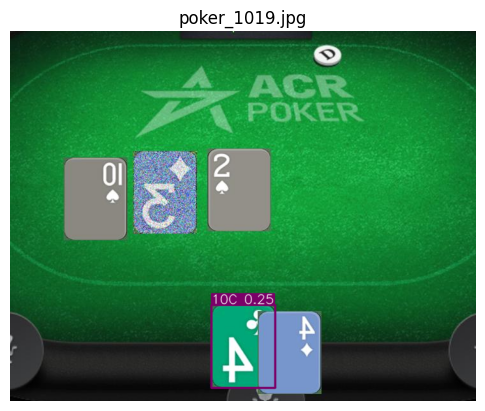

Running inference on D:\PokerObjectDetection\dataset\images\poker_102.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_102.jpg: 512x640 (no detections), 18.2ms
Speed: 3.4ms preprocess, 18.2ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_1020.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_1020.jpg: 512x640 (no detections), 18.0ms
Speed: 2.5ms preprocess, 18.0ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_1021.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_1021.jpg: 512x640 (no detections), 17.2ms
Speed: 2.5ms preprocess, 17.2ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_1022.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_1022.jpg: 512x640 (no detections), 17.9ms
Speed: 

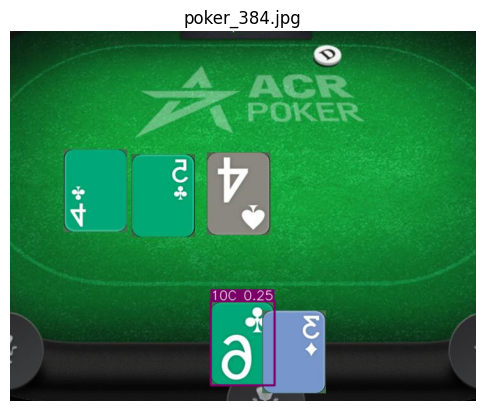

Running inference on D:\PokerObjectDetection\dataset\images\poker_385.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_385.jpg: 512x640 (no detections), 18.2ms
Speed: 2.5ms preprocess, 18.2ms inference, 0.9ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_386.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_386.jpg: 512x640 (no detections), 18.3ms
Speed: 2.6ms preprocess, 18.3ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_387.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_387.jpg: 512x640 (no detections), 16.6ms
Speed: 3.1ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Running inference on D:\PokerObjectDetection\dataset\images\poker_388.jpg...

image 1/1 D:\PokerObjectDetection\dataset\images\poker_388.jpg: 512x640 (no detections), 16.6ms
Speed: 2.5ms 

KeyboardInterrupt: 

: 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

model = YOLO("runs/train/poker_cards6/weights/best.pt")
model.to('cuda:0')  

image_dir = r"D:\PokerObjectDetection\dataset\images"
assert os.path.isdir(image_dir), "Image directory not found!"

# Get all image paths
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]

print(f"Found {len(image_paths)} images. Searching for detections...")

# Loop through images to find one with detections
for img_path in image_paths:
    print(f"Running inference on {img_path}...")
    results = model(img_path)
    
    for r in results:
        if len(r.boxes) > 0:
            print(f"✅ Detections found: {len(r.boxes)}")
            im_array = r.plot()
            plt.imshow(im_array[..., ::-1])  # BGR to RGB
            plt.axis('off')
            plt.title(os.path.basename(img_path))
            plt.show()
            exit()  # Stop after first image with detections

print("❌ No detections found in any image.")